In [1]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Plot style
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.2)


In [2]:
# ================================
# 2. Load Dataset
# ================================
df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

df.head()


,Date,Local_Route,Light_Rail,Peak_Service,Rapid_Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [3]:
# ================================
# 3. Convert Date Column & Sort
# ================================
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 1013 to 160
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local_Route   1918 non-null   int64         
 2   Light_Rail    1918 non-null   int64         
 3   Peak_Service  1918 non-null   int64         
 4   Rapid_Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1898 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 119.9 KB


In [4]:
# ================================
# 4. Check Missing Values
# ================================
df.isnull().sum()




Date             0
Local_Route      0
Light_Rail       0
Peak_Service     0
Rapid_Route      0
School           0
Other           20
dtype: int64

In [5]:
# ================================
# 5. Summary Statistics
# ================================
df.describe()


,Date,Local_Route,Light_Rail,Peak_Service,Rapid_Route,School,Other
count,1918,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,2022-02-13 12:00:00,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
min,2019-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-10-22 06:00:00,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,2022-02-13 12:00:00,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,2023-06-07 18:00:00,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,2024-09-29 00:00:00,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000
std,NaN,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882


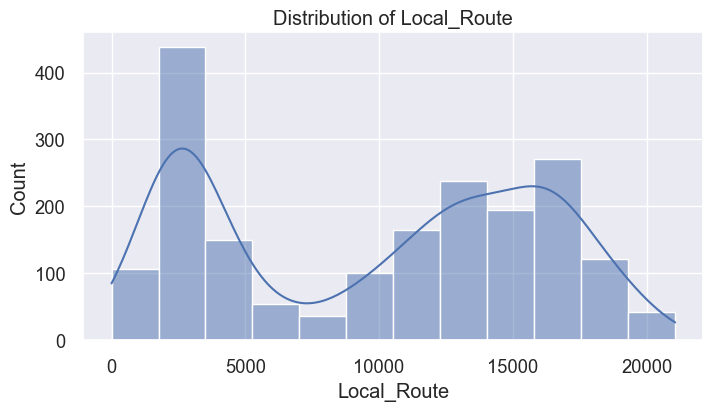

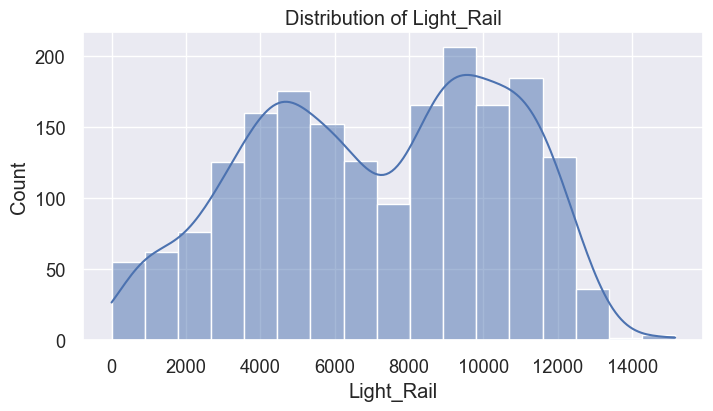

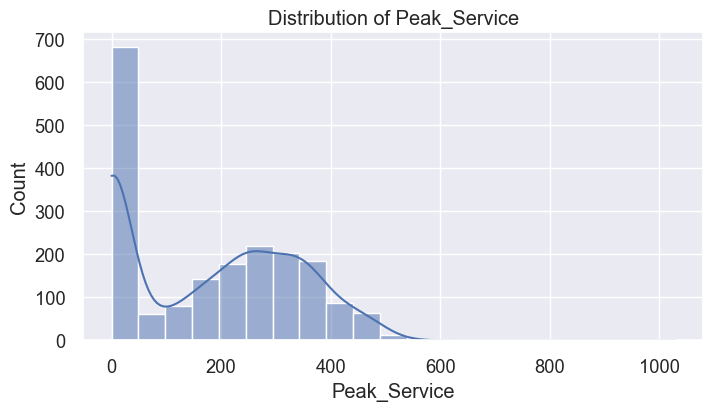

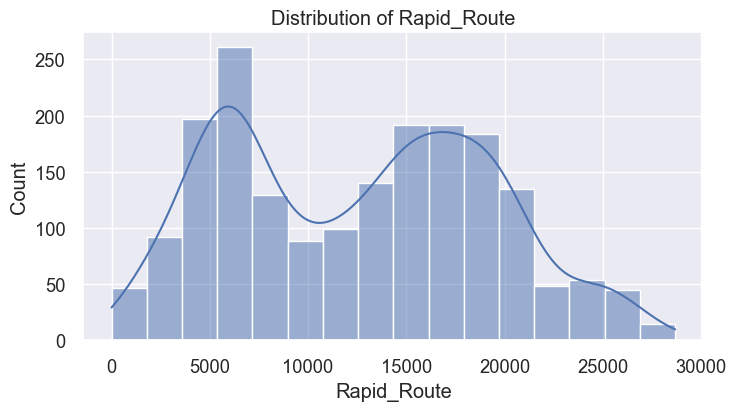

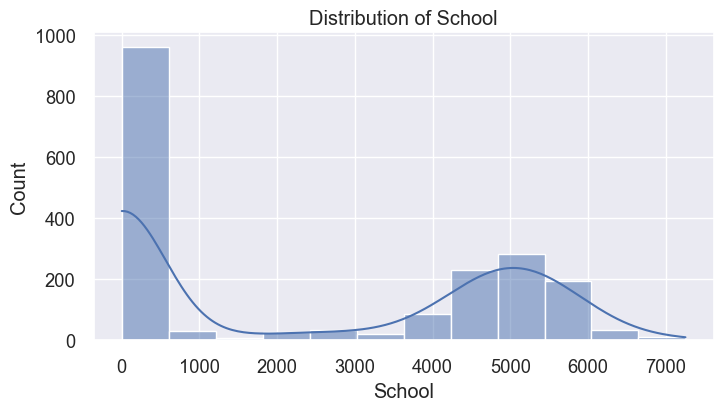

In [6]:
# ================================
# 6. Distribution Plots (Hist + KDE)
# ================================
service_cols = ["Local_Route", "Light_Rail", "Peak_Service", "Rapid_Route", "School"]

for col in service_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


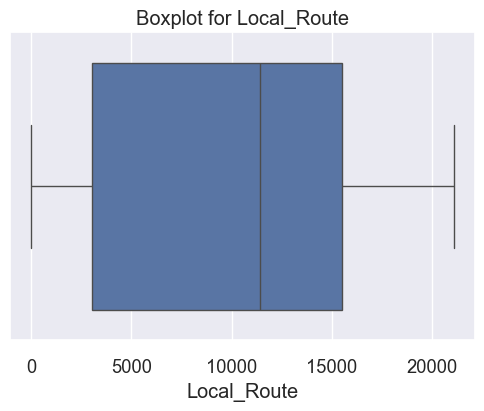

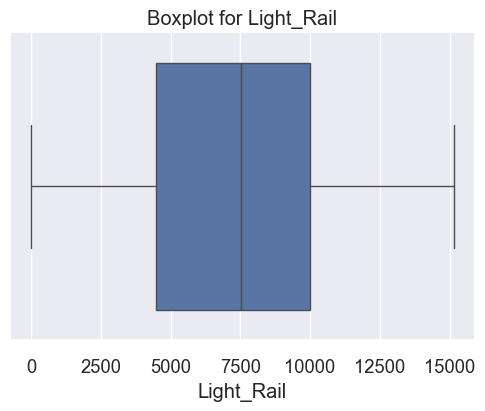

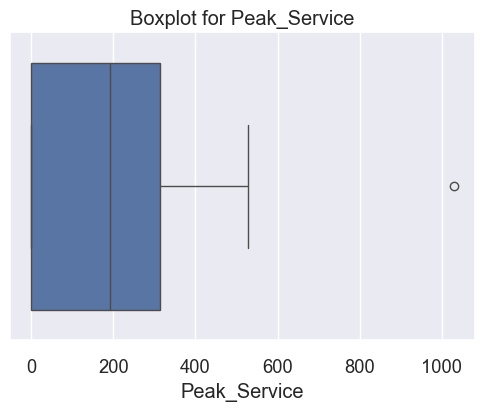

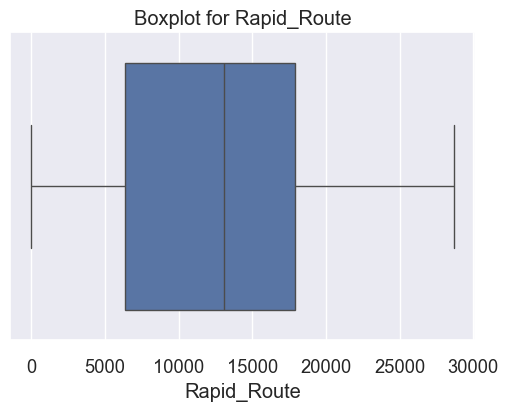

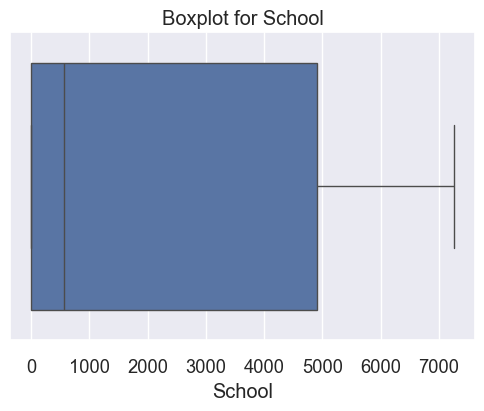

,Local_Route,Light_Rail,Peak_Service,Rapid_Route,School
Q1,3044.5,4463.50,0.00,6383.00,0.0
Q3,15517.5,10008.25,313.75,17924.75,4914.0
IQR,12473.0,5544.75,313.75,11541.75,4914.0


In [7]:
# ================================
# 7. Boxplots + IQR Outlier Detection
# ================================
for col in service_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# IQR Table
iqr_data = {}
for col in service_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_data[col] = [Q1, Q3, IQR]

iqr_df = pd.DataFrame(iqr_data, index=["Q1", "Q3", "IQR"])
iqr_df


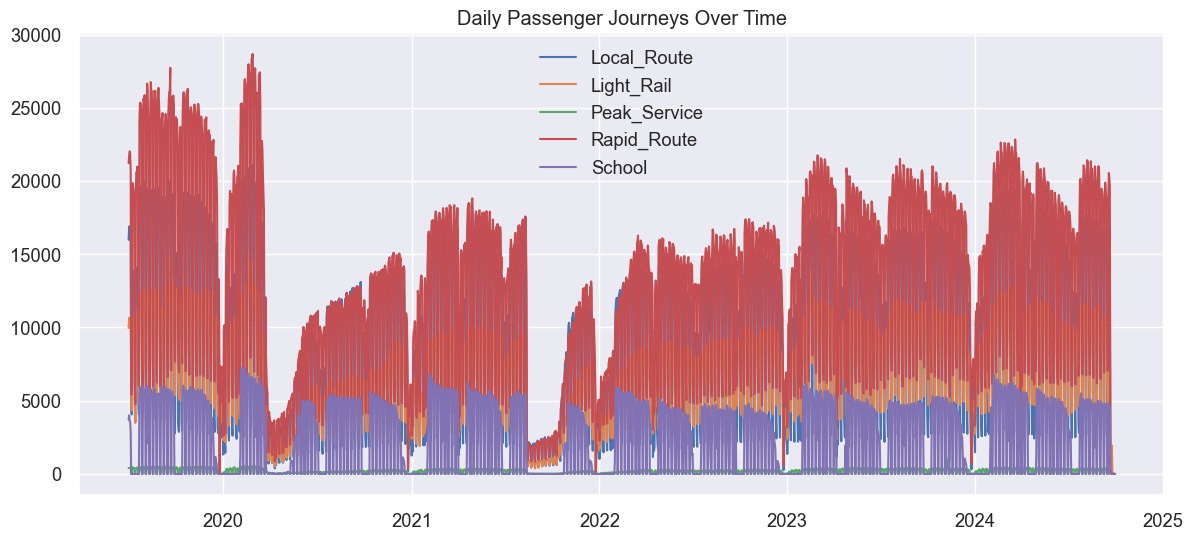

In [8]:
# ================================
# 8. Time-Series Trends
# ================================
plt.figure(figsize=(14,6))
for col in service_cols:
    plt.plot(df["Date"], df[col], label=col)
plt.legend()
plt.title("Daily Passenger Journeys Over Time")
plt.show()


=== Local_Route ===


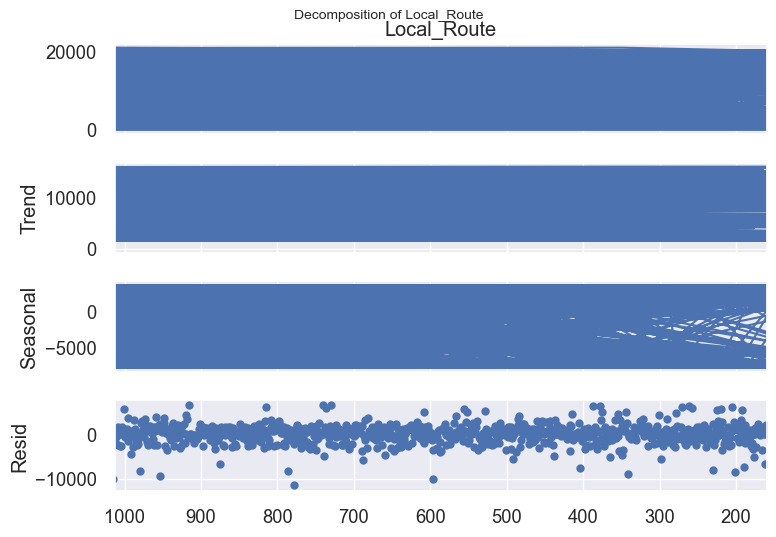

=== Light_Rail ===


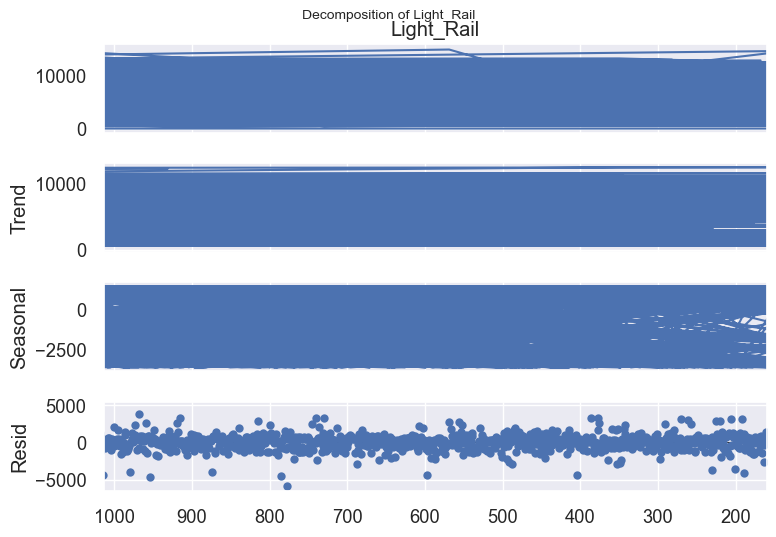

=== Peak_Service ===


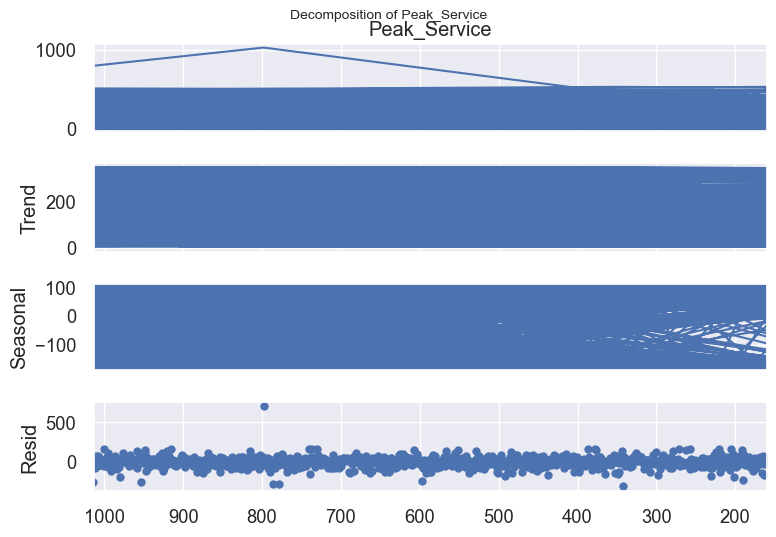

=== Rapid_Route ===


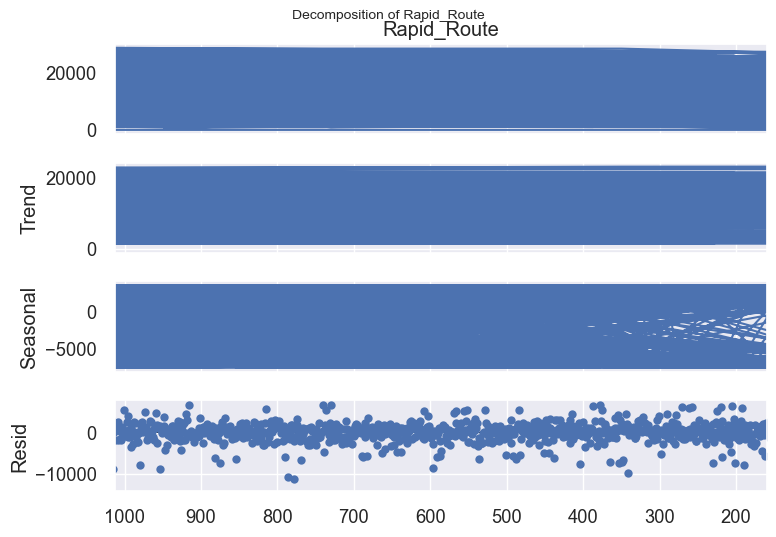

=== School ===


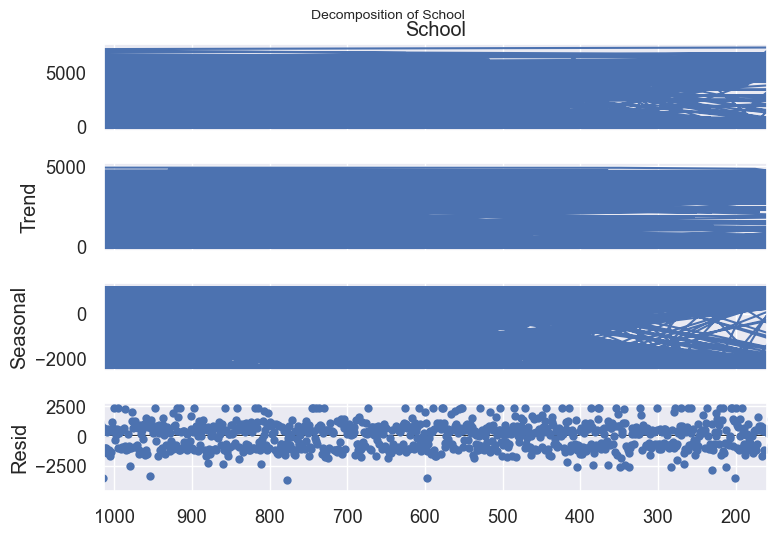

In [18]:
# ================================
# 9. Seasonal Decomposition
# ================================
for col in service_cols:
    print(f"=== {col} ===")
    result = seasonal_decompose(df[col], model="additive", period=7)
    result.plot()
    plt.suptitle(f"Decomposition of {col}", fontsize=10)
    plt.show()


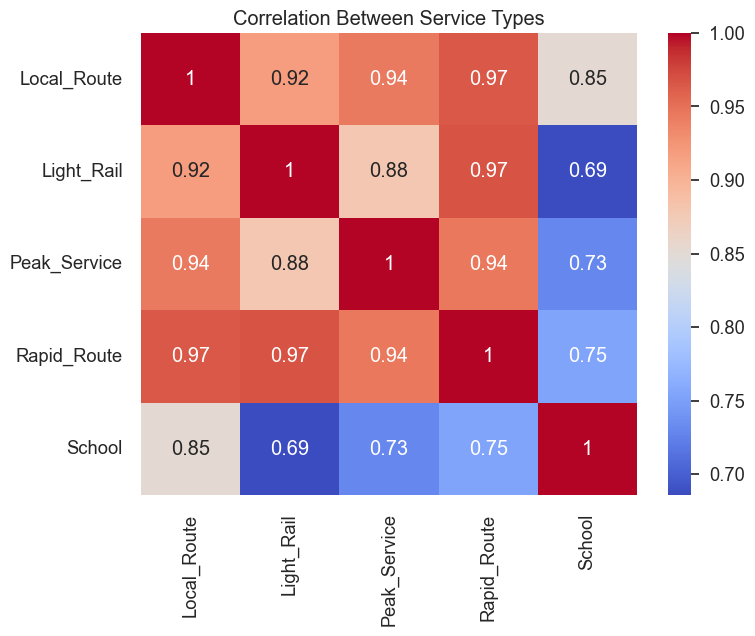

In [10]:
# ================================
# 10. Correlation Heatmap
# ================================
plt.figure(figsize=(8,6))
sns.heatmap(df[service_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Service Types")
plt.show()


In [11]:
# ================================
# 11. Weekday/Weekend Patterns
# ================================
df["Weekday"] = df["Date"].dt.day_name()
df["DayType"] = df["Date"].dt.weekday.apply(lambda x: "Weekend" if x>=5 else "Weekday")

weekday_mean = df.groupby("DayType")[service_cols].mean()
weekday_mean


,Local_Route,Light_Rail,Peak_Service,Rapid_Route,School
DayType,,,,,
Weekday,12755.348175,8355.815328,251.413869,15297.278102,3293.729197
Weekend,2731.512774,4294.523723,0.000000,5847.051095,0.109489


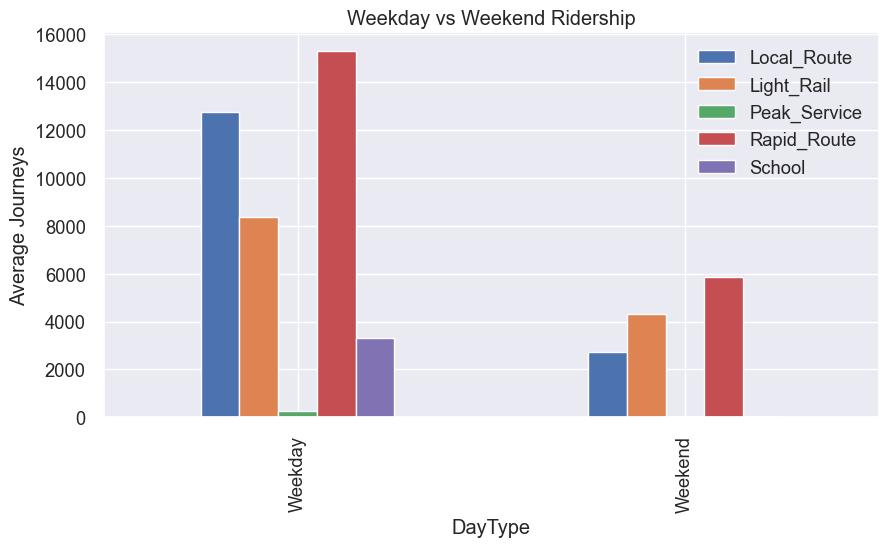

In [12]:
# Visualization: Weekday vs Weekend
weekday_mean.plot(kind="bar", figsize=(10,5))
plt.title("Weekday vs Weekend Ridership")
plt.ylabel("Average Journeys")
plt.show()


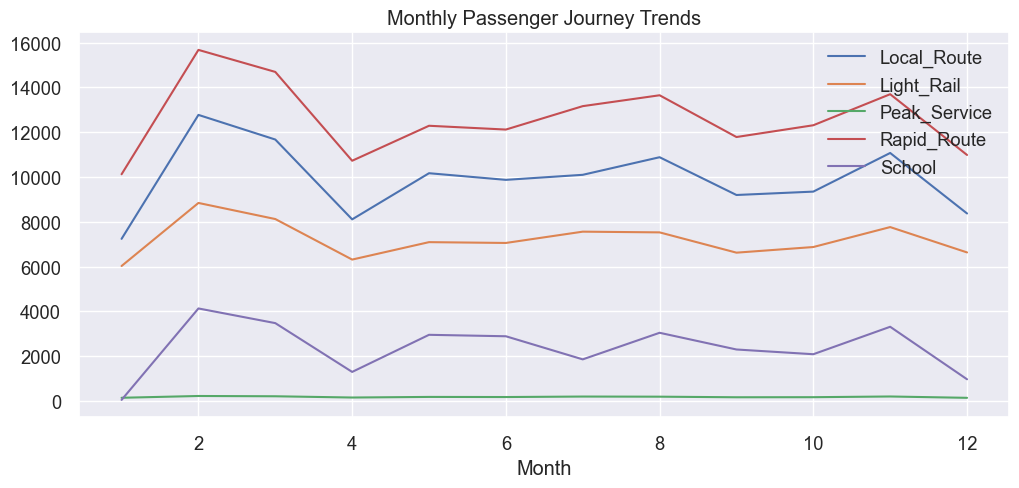

In [13]:
# ================================
# 12. Monthly Trends
# ================================
df["Month"] = df["Date"].dt.month

month_avg = df.groupby("Month")[service_cols].mean()
month_avg.plot(figsize=(12,5))
plt.title("Monthly Passenger Journey Trends")
plt.show()


In [14]:
# ================================
# 13. Seasonal Summary (Quarter)
# ================================
df["Quarter"] = df["Date"].dt.quarter
seasonal_avg = df.groupby("Quarter")[service_cols].mean()
seasonal_avg


,Local_Route,Light_Rail,Peak_Service,Rapid_Route,School
Quarter,,,,,
1,10496.360619,7628.860619,191.194690,13431.955752,2506.152655
2,9390.580220,6822.035165,170.751648,11715.164835,2386.474725
3,10068.533575,7243.108893,185.495463,12877.520871,2401.444646
4,9580.141304,7081.830435,169.819565,12313.689130,2110.100000


In [15]:
# ================================
# 14. Outlier Detection using IQR
# ================================
outlier_flags = pd.DataFrame({"Date": df["Date"]})

for col in service_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_flags[col+"_Outlier"] = ((df[col] < lower) | (df[col] > upper))

outlier_flags.head()


,Date,Local_Route_Outlier,Light_Rail_Outlier,Peak_Service_Outlier,Rapid_Route_Outlier,School_Outlier
1013,2019-07-01,False,False,False,False,False
1120,2019-07-02,False,False,False,False,False
1451,2019-07-03,False,False,False,False,False
1171,2019-07-04,False,False,False,False,False
1523,2019-07-05,False,False,False,False,False
